Get the dataset from Roboflow

In [1]:
import config

from roboflow import Roboflow
rf = Roboflow(api_key=config.api_key)
project = rf.workspace("mikkel-ds").project("football-player-detection-xvszo")
dataset = project.version(2).download("yolov8")

import yaml
with open(f"{dataset.location}/data.yaml") as f:
    doc = yaml.safe_load(f)

    doc['train'] = f"{dataset.location}/train"
    doc['val'] = f"{dataset.location}/valid"

with open(f'{dataset.location}/data.yaml', 'w') as f:
    yaml.safe_dump(doc, f)

/usr/lib/python3/dist-packages/requests/__init__.py:87: RequestsDependencyWarning: urllib3 (2.0.4) or chardet (4.0.0) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.134 is required but found version=8.0.153, to fix: `pip install ultralytics==8.0.134`


Extracting Dataset Version Zip to Football-Player-Detection-2 in yolov8:: 100%|██████████| 55/55 [00:00<00:00, 3690.99it/s]


In [2]:
dataset.location

'/home/mikkel/VSC/Footbal Players Detection/football-player-detection/Football-Player-Detection-2'

Visualize image with bounding boxes

Image height: 1080, Image width: 1920


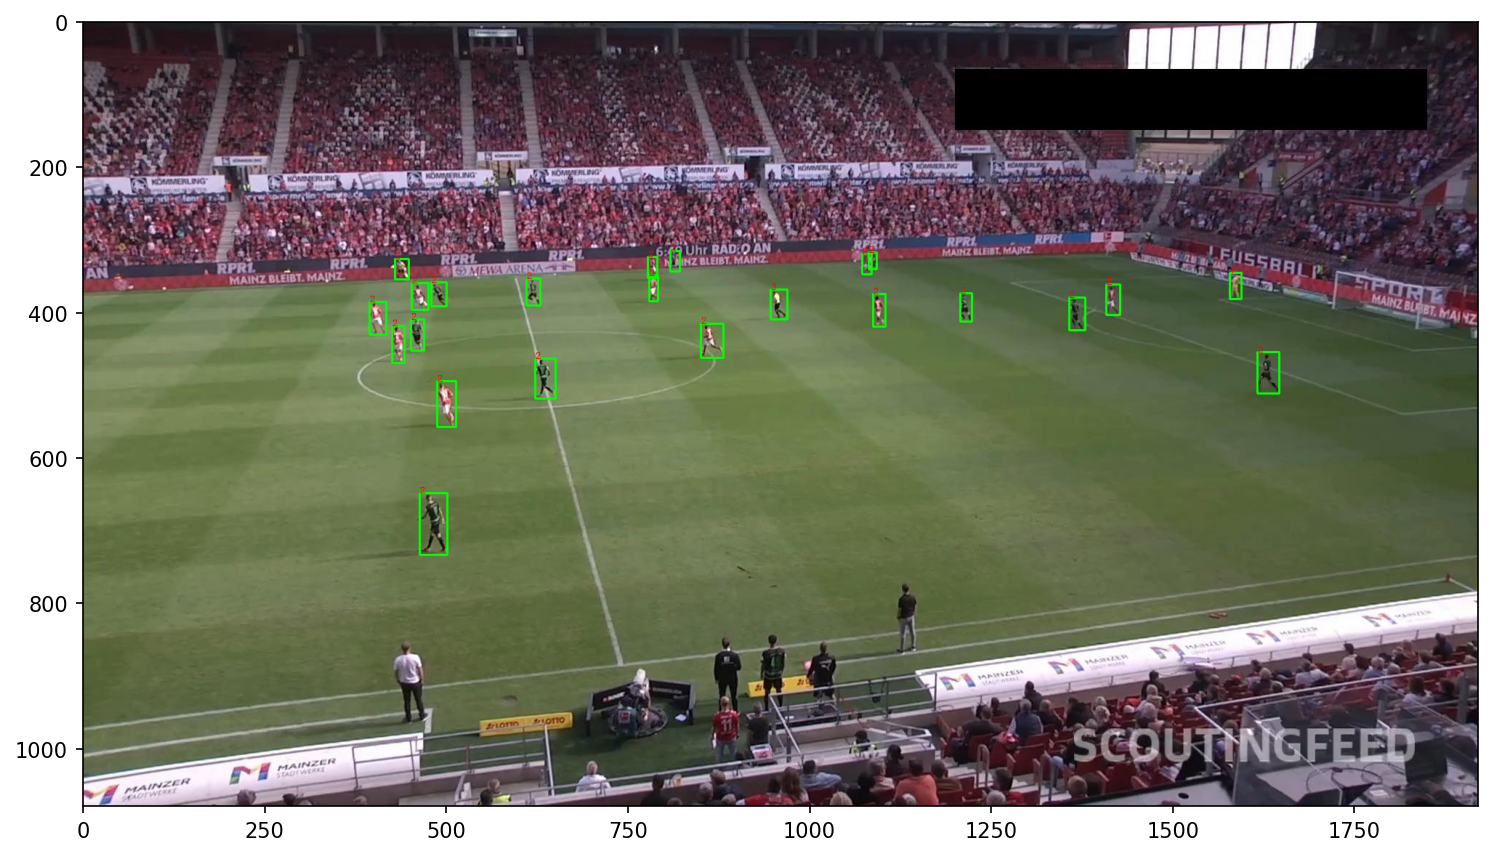

In [3]:
from utils import visualize

visualize(
    im_path=f"{dataset.location}/train/images/0b1495d3_0_mp4-0_jpg.rf.ca741cd9d337202959249e6cd18afdad.jpg", 
    label_path=f"{dataset.location}/train/labels/0b1495d3_0_mp4-0_jpg.rf.ca741cd9d337202959249e6cd18afdad.txt"
)

In [4]:
from ultralytics import YOLO

model = YOLO('yolov8m.pt')
results = model.train(data=f'{dataset.location}/data.yaml', epochs=100, batch=1, verbose=True)

Ultralytics YOLOv8.0.153 🚀 Python-3.10.12 torch-2.0.1+cu117 CUDA:0 (NVIDIA GeForce RTX 3060, 12036MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/home/mikkel/VSC/Footbal Players Detection/football-player-detection/Football-Player-Detection-2/data.yaml, epochs=100, patience=50, batch=1, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_ma

In [5]:
model = YOLO('runs/detect/train/weights/best.pt')
metrics = model.val()

Ultralytics YOLOv8.0.153 🚀 Python-3.10.12 torch-2.0.1+cu117 CUDA:0 (NVIDIA GeForce RTX 3060, 12036MiB)


Model summary (fused): 218 layers, 25842076 parameters, 0 gradients
val: Scanning /home/mikkel/VSC/Footbal Players Detection/football-player-detection/Football-Player-Detection-2/valid/labels.cache... 2 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2/2 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.89it/s]
                   all          2         46       0.27      0.303      0.258      0.148
                  ball          2          1          0          0          0          0
                keeper          2          2      0.444      0.444      0.324      0.244
                player          2         39      0.638      0.769      0.688      0.337
               referee          2          4          0          0     0.0219     0.0126
Speed: 0.2ms preprocess, 34.1ms inference, 0.0ms loss, 0.5ms postprocess per image
Results saved to runs/detect/val
